In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
from google.colab import files
data =  files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [3]:
df = pd.read_csv('Wholesale customers data.csv')

In [4]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
df.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [6]:
df.tail(12)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
428,1,3,3047,5970,4910,2198,850,317
429,1,3,8607,1750,3580,47,84,2501
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867


In [7]:
df.iloc[125:135]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
125,1,3,76237,3473,7102,16538,778,918
126,1,3,19219,1840,1658,8195,349,483
127,2,3,21465,7243,10685,880,2386,2749
128,1,3,140,8847,3823,142,1062,3
129,1,3,42312,926,1510,1718,410,1819
130,1,3,7149,2428,699,6316,395,911
131,1,3,2101,589,314,346,70,310
132,1,3,14903,2032,2479,576,955,328
133,1,3,9434,1042,1235,436,256,396
134,1,3,7388,1882,2174,720,47,537


In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
df['Region'].unique()

array([3, 1, 2])

In [12]:
df = df.drop(['Channel'],axis = 1)

In [13]:
x = df.iloc[:,:].values

In [14]:
x

array([[    3, 12669,  9656, ...,   214,  2674,  1338],
       [    3,  7057,  9810, ...,  1762,  3293,  1776],
       [    3,  6353,  8808, ...,  2405,  3516,  7844],
       ...,
       [    3, 14531, 15488, ...,   437, 14841,  1867],
       [    3, 10290,  1981, ...,  1038,   168,  2125],
       [    3,  2787,  1698, ...,    65,   477,    52]])

In [15]:
x.shape

(440, 7)

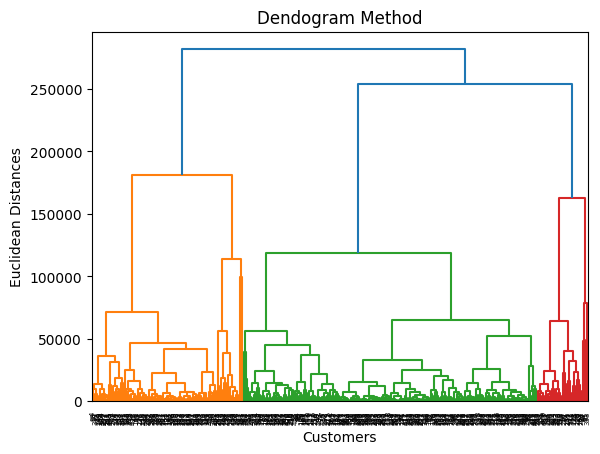

In [16]:
# Dendogram Method
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.savefig('img_1.png', dpi=500)
plt.show()

In [17]:
# Fitting Hierarchical Cluster Analysis to dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward')
Y_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


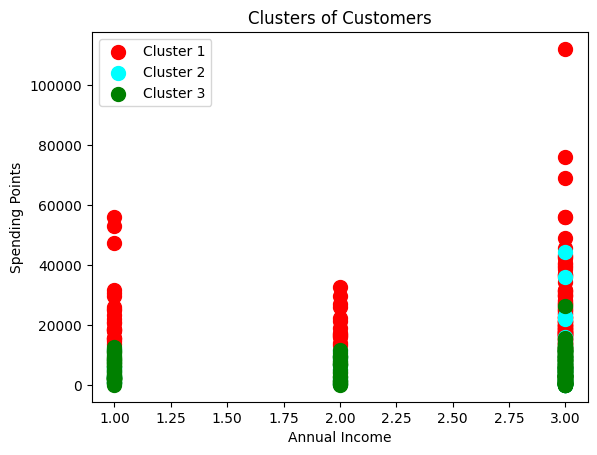

In [18]:
# Visualising the clusters
plt.scatter(x[Y_hc==0, 0], x[Y_hc==0, 1], s=100, c='red', label= 'Cluster 1')
plt.scatter(x[Y_hc==1, 0], x[Y_hc==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(x[Y_hc==2, 0], x[Y_hc==2, 1], s=100, c='green', label= 'Cluster 3')
#plt.scatter(x[Y_hc==3, 0], x[Y_hc==3, 1], s=100, c='blue', label= 'Cluster 4')
#plt.scatter(x[Y_hc==4, 0], x[Y_hc==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

In [19]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [20]:
print(silhouette_score(x,hc.labels_))
print(calinski_harabasz_score(x,hc.labels_))
print(davies_bouldin_score(x,hc.labels_))

0.37501551937192906
183.35966672347763
0.9782550605259909
